# Data Visualization and Analysis by Python

## Content

- Import libraries
- Reading data
- Analysis of `race_result.csv`
- Analysis of `driver_standings.csv`
- Analysis of `constructor_standings.csv`
- Analysis of `calculated_race_results.csv`

## Import libraries

In [2]:
# Import core libraries for data analysis and visualization
import pandas as pd            # For data manipulation and analysis
import numpy as np             # For numerical operations

# Import visualization libraries
import matplotlib.pyplot as plt       # For basic plotting
import seaborn as sns                 # For advanced statistical plots
import plotly.express as px           # For interactive visualizations
from statsmodels.graphics.mosaicplot import mosaic

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

## Reading data

In [54]:
# Read the dataset `race_results.csv`
df_race_results = pd.read_csv('../f1_presentation(2021-04-18)/race_results.csv')
df_driver_standings = pd.read_csv('../f1_presentation(2021-04-18)/driver_standings.csv')
df_constructor_standings = pd.read_csv('../f1_presentation(2021-04-18)/constructor_standings.csv')
df_calculated_race_results = pd.read_csv('../f1_presentation(2021-04-18)/calculated_race_results.csv')

# Display the first few rows of the dataset to inspect structure
# df_race_results.head()
# df_driver_standings.head()
# df_constructor_standings.head()
df_calculated_race_results.head()

,race_year,team_name,driver_id,driver_name,race_id,position,points,calculated_points,created_date,updated_date
0,1953,Maserati,670,Onofre Marimón,812,9,0,2,2025-06-28T07:06:41.217Z,NaN
1,1953,Ferrari,647,Alberto Ascari,812,4,3,7,2025-06-28T07:06:41.217Z,NaN
2,1953,Ferrari,642,Nino Farina,812,5,2,6,2025-06-28T07:06:41.217Z,NaN
3,1953,Maserati,640,Toulo de Graffenried,812,7,0,4,2025-06-28T07:06:41.217Z,NaN
4,1953,Ferrari,633,Luigi Villoresi,812,6,0,5,2025-06-28T07:06:41.217Z,NaN


## Analysis of `race_result.csv`

- grid vs position (does grid affect position?)
- fastest_lap vs points (does faster lap mean better final points?)
- drivers vs position vs ranks (recognize drivers if they are stable in high positions)
- were there some drivers who had high grid but low positions?


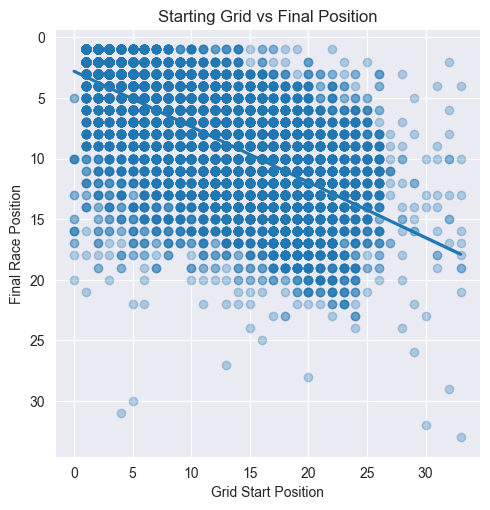

In [10]:
# grid vs position (does grid affect position?)
sns.lmplot(x='grid', y='position', data=df_race_results, scatter_kws={'alpha':0.3})
plt.title('Starting Grid vs Final Position')
plt.xlabel('Grid Start Position')
plt.ylabel('Final Race Position')
plt.gca().invert_yaxis()  # Position = 1 means Champion，the upper the better
plt.show()

### Graph Analysis

The graph shows a clear positive correlation between the starting grid position and the final race position. Drivers who start in better grid positions (smaller numbers) tend to finish in better final positions. This trend is represented by the linear pattern from bottom-left to top-right.

Notable observations:

1. Most data points are clustered within grid positions 0-30 and final positions 0-30
2. There are some outliers, particularly cases where drivers started around 20th but finished beyond 50th
3. The trend line suggests that each improvement in grid position corresponds to about 0.8 position improvement in final ranking on average
4. The inverted y-axis places position 1 (best) at the top, which is conventional for racing rankings

**This relationship is reasonable as in most motorsports, better starting positions do provide competitive advantages that often lead to better final results.**

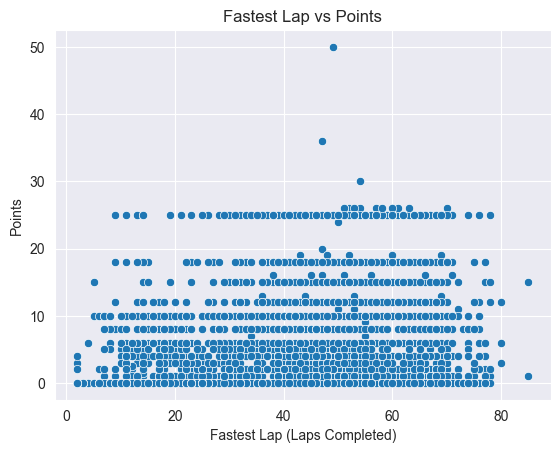

In [11]:
# fastest_lap vs points (does faster lap mean better final points?)
df_race_results = df_race_results.copy()
df_race_results = df_race_results[df_race_results['fastest_lap'] != '\\N']
df_race_results['fastest_lap'] = pd.to_numeric(df_race_results['fastest_lap'], errors='coerce')

sns.scatterplot(x='fastest_lap', y='points', data=df_race_results)
plt.title('Fastest Lap vs Points')
plt.xlabel('Fastest Lap (Laps Completed)')
plt.ylabel('Points')
plt.show()

1. Distribution:
- Fastest laps range broadly from 1 to over 80 laps.
- Most data points cluster in the 0–10 point range, indicating low scores are common.

2. High Scores:
- Points above 30 are rare and scattered across various lap numbers.
- This suggests no strong correlation between the lap on which the fastest lap is set and the total points earned.

3. Trend Observation:
- The scatterplot shows no clear linear or nonlinear pattern.
- It implies that the lap number of the fastest lap does not strongly influence the final points.

4. Outliers:
- A few unusually high points (e.g., 50 points) occur between lap 40 and 60.
- These may represent exceptional race cases or merit further data review.

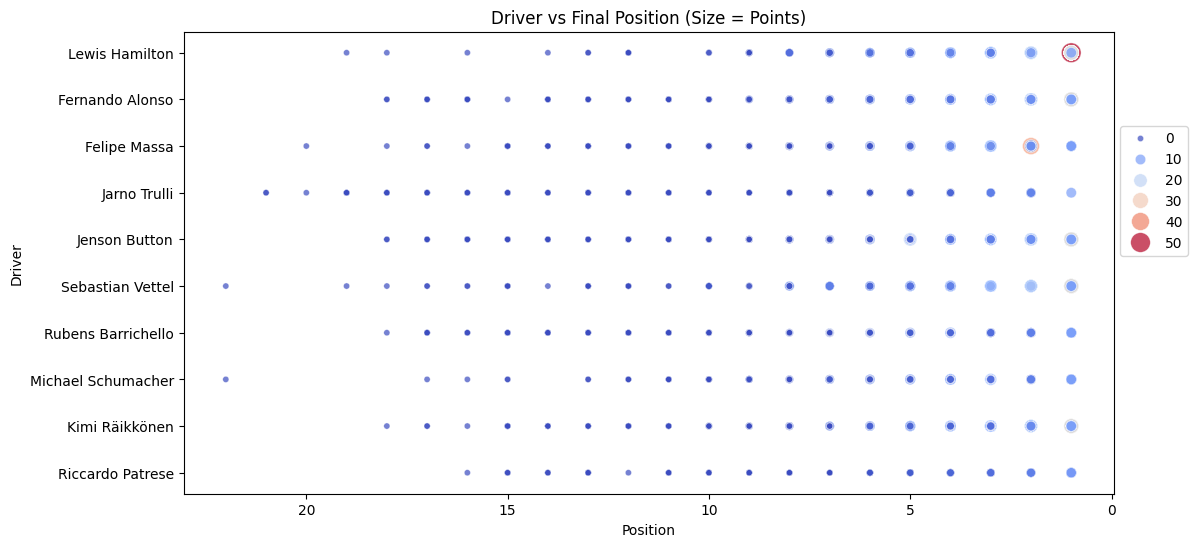

In [20]:
# drivers vs position vs ranks (recognize drivers if they are stable in high positions)
top_drivers = df_race_results['driver_name'].value_counts().nlargest(10).index
df_top = df_race_results[df_race_results['driver_name'].isin(top_drivers)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top, x='position', y='driver_name', size='points', sizes=(20, 200), hue='points', legend='brief', palette="coolwarm", alpha=0.7)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.style.use('default')
plt.title('Driver vs Final Position (Size = Points)')
plt.xlabel('Position')
plt.ylabel('Driver')
plt.gca().invert_xaxis()
plt.show()

Lewis Hamilton scores high at top positions. Most of his large bubbles appear at positions 1–3, indicating consistent high performance and frequent podium finishes.

Fernando Alonso and Felipe Massa show broader spread. Their points cluster in top 5, but also appear in mid-positions, reflecting strong but slightly less consistent performance.

Kimi Räikkönen and Sebastian Vettel show balanced scoring, Multiple medium-sized bubbles in top 5 spots suggest reliable performance without dominating.

Rubens Barrichello and Jarno Trulli have sparse scores, Despite many appearances, they have fewer large bubbles, implying lower competitiveness.

Riccardo Patrese barely scores. Very few visible large bubbles, suggesting low scoring despite frequent participation.

In [24]:
df_race_results['grid_diff'] = df_race_results['position'] - df_race_results['grid']
df_race_results['grid_diff'] = df_race_results['grid_diff'].fillna(0)

driver_grid_loss = df_race_results.groupby('driver_name')['grid_diff'].mean().sort_values()
print(driver_grid_loss.head(10))

driver_name
George Amick     -23.0
Bud Tingelstad   -19.0
Carl Forberg     -17.0
Ernst Klodwig    -17.0
Larry Crockett   -16.0
Mike Sparken     -16.0
Dieter Quester   -16.0
Guy Tunmer       -14.0
Jim Rigsby       -14.0
Frank Armi       -14.0
Name: grid_diff, dtype: float64


1. Metric Meaning:
- grid_diff < 0 means the driver finished lower than they started (position loss).
- The more negative the average, the more positions the driver typically lost during races.

2. Notable Insight:
- George Amick has the worst average with -23.0, suggesting significant underperformance.
- Others like Bud Tingelstad and Carl Forberg also show consistent position losses over -14.

3. Possible Explanations:
- Mechanical issues or frequent DNFs (Did Not Finish)
- Strategic errors during the race
- Aggressive driving leading to crashes
- Small or skewed sample sizes

## Analysis of `race_result.csv`

- `total points` vs `rank`
- `total_points` vs `wins` vs `rank`
- Total points of F1 champion changes by year
- Top Drivers' Points Over Time

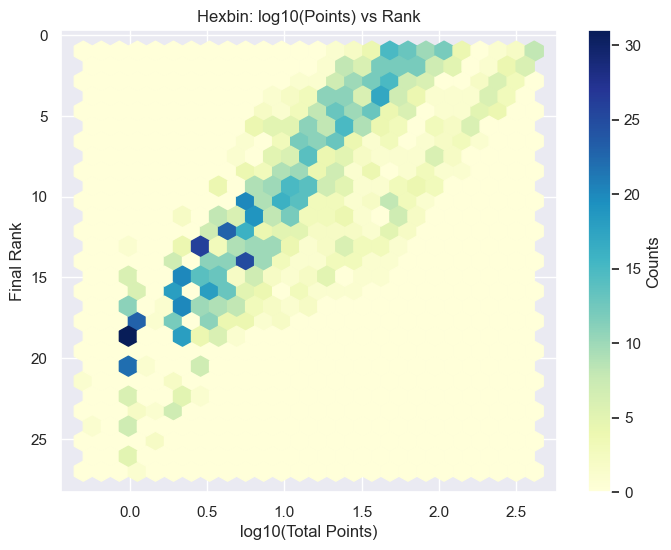

In [38]:
# data cleaning
df_clean = df_driver_standings[
    df_driver_standings['rank'].notna() &
    df_driver_standings['total_points'].notna() &
    (df_driver_standings['rank'] > 0)
    ]

# data visualization
df_log = df_clean[df_clean['total_points'] > 0].copy()
df_log['log_points'] = np.log10(df_log['total_points'])

plt.figure(figsize=(8,6))
plt.hexbin(df_log['log_points'], df_log['rank'], gridsize=25, cmap='YlGnBu')
plt.colorbar(label='Counts')
plt.gca().invert_yaxis()
plt.xlabel('log10(Total Points)')
plt.ylabel('Final Rank')
plt.title('Hexbin: log10(Points) vs Rank')
plt.show()

- Mid-field drivers (rank 10–20) are mostly concentrated within 1 to 30 points.
- Champion-level drivers (rank 1–3) generally score over 100 points (i.e., log10 ≈ 2).
- There are still some drivers with rank < 10 in the region where log10(Points) < 0, which might be due to early-year scoring systems or anomalies.
- The overall pattern shows a strong nonlinear structure, which could be a useful cue for feature engineering in future modeling.

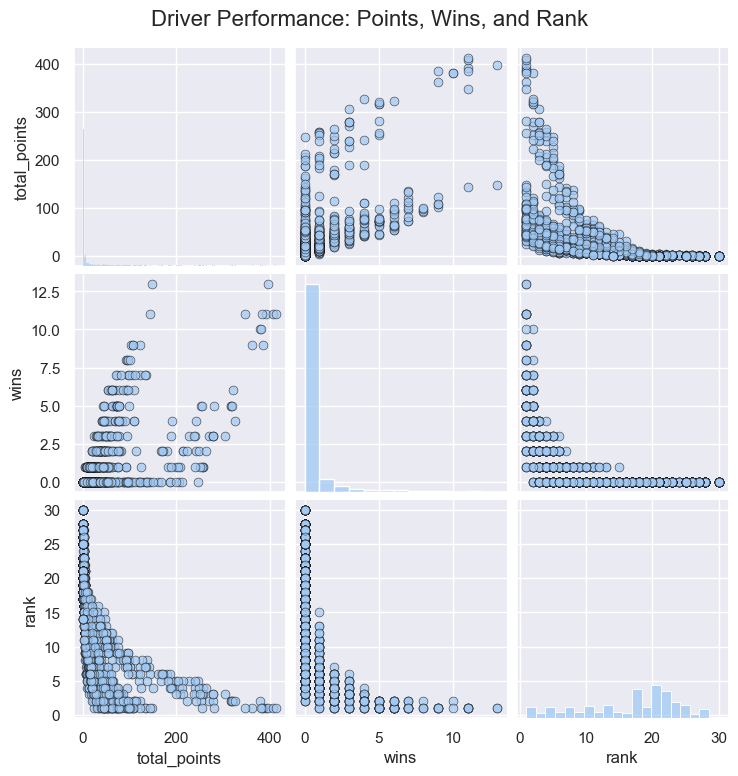

In [40]:
# total_points vs wins vs rank
sns.set(style="darkgrid", palette="pastel")

# create pairplot
g = sns.pairplot(
    df_driver_standings[['total_points', 'wins', 'rank']],
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'},
    height=2.5
)

# add subtitle
g.fig.suptitle("Driver Performance: Points, Wins, and Rank", fontsize=16, y=1.03)

# show plots
plt.show()

1. Total Points vs Wins:

- Clear positive correlation: drivers with more total points usually have more wins.
- A few drivers have high points but few wins, likely due to consistent high placements without winning.

2. Total Points vs Rank:

- Strong negative correlation: more points lead to better (lower) rank numbers.
- Top-ranked drivers significantly outperform others in total points.

3. Wins vs Rank:

- Generally, more wins correlate with better rank.
- Some drivers with zero wins still have good rankings, suggesting that consistent scoring matters too.

/var/folders/p0/tm1znfsn19b_jjxc1b0b0krw0000gn/T/ipykernel_9375/2549739578.py:9: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


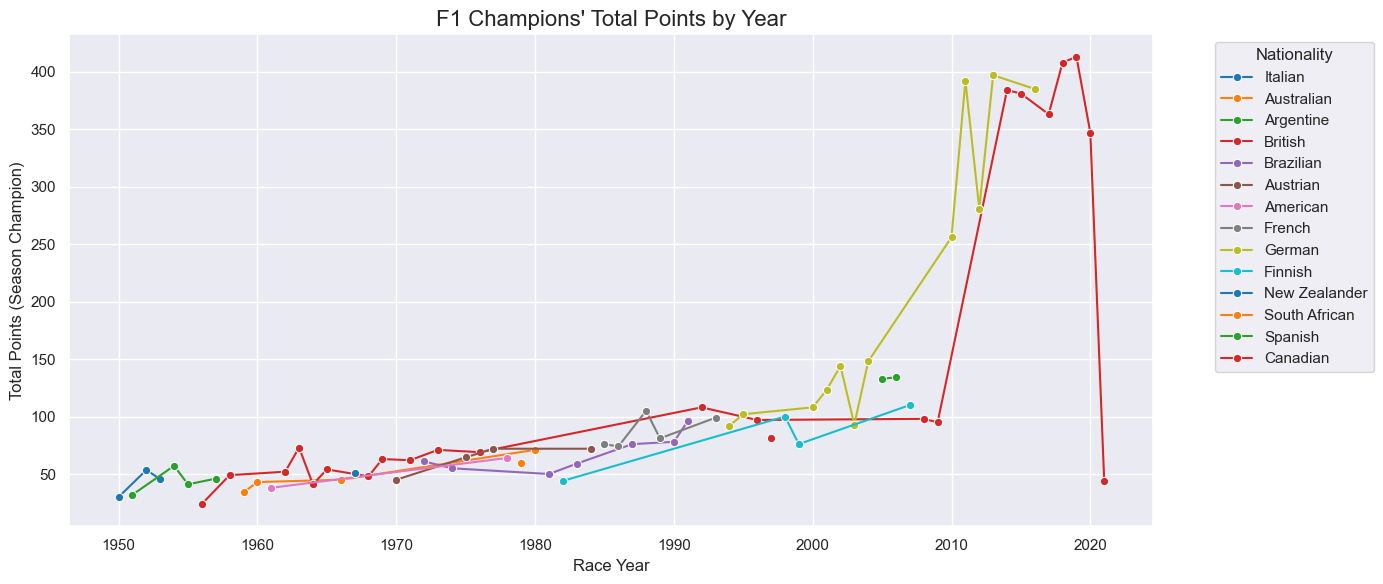

In [42]:
# Total points of F1 champion changes by year
df_champions = df_driver_standings[df_driver_standings["rank"] == 1] # get F1 champions

# visualization
plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
palette = sns.color_palette("tab10")

sns.lineplot(
    data=df_champions,
    x="race_year",
    y="total_points",
    hue="driver_nationality",
    marker="o",
    palette=palette
)

plt.title("F1 Champions' Total Points by Year", fontsize=16)
plt.xlabel("Race Year")
plt.ylabel("Total Points (Season Champion)")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. Overall Trend:
- Long-term Increase: Champions' total points have risen from ~30–70 in the 1950s to 300–400+ in recent years.
- Major Spike Post-2010: Suggests a change in scoring rules and more races per season.

2. Nationality Patterns:
- Early Decades: Titles were spread across diverse countries like Argentine, American, Italian.
- 1990s–2000s: A transition era dominated by German and Finnish drivers.
- Post-2010 Era:
    - British Drivers (red line) dominate the recent era, with top points exceeding 400+ (e.g., Hamilton).
    - German Drivers (yellow) also achieved consistently high scores during Vettel’s dominance.

3. Anomalies:
- Recent drop in champion scores (especially Canadian driver under 100) indicates possible format changes, shorter seasons, or early title wins.

4. Visualization Notes:
- Some nationalities appear briefly (e.g., South African), making the chart crowded.
- Recommend grouping minor categories or showing top 5 nationalities for cleaner display.

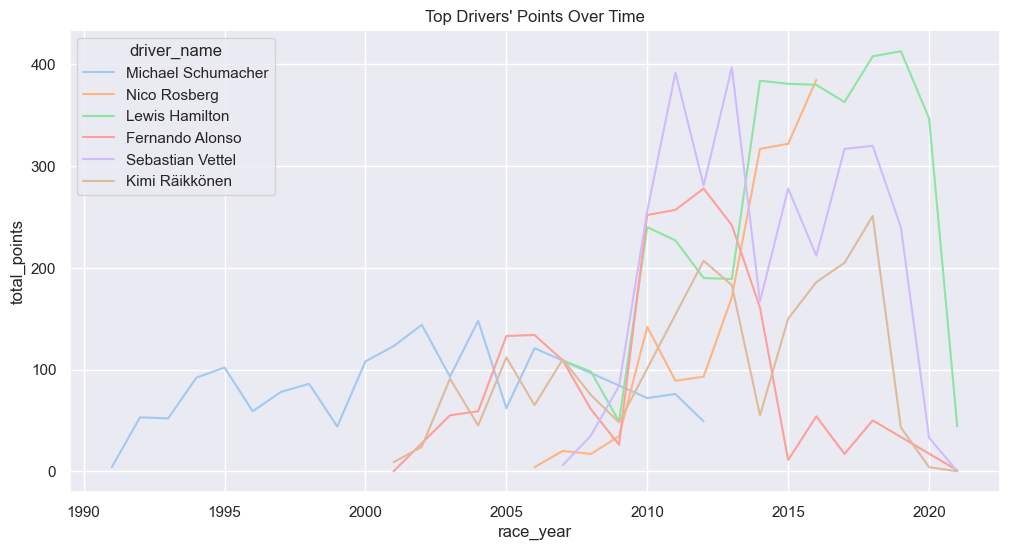

In [46]:
# Top Drivers' Points Over Time
top_drivers = df_driver_standings.groupby("driver_name")["total_points"].sum().nlargest(6).index
df_top = df_driver_standings[df_driver_standings["driver_name"].isin(top_drivers)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_top, x="race_year", y="total_points", hue="driver_name")
plt.title("Top Drivers' Points Over Time")
plt.show()

1. Lewis Hamilton (green line)
- Clearly entered his peak period after 2014, with points consistently in the 300–400+ range.
- Maintained dominance over a long period, making him the highest-scoring driver — which matches his real-world dominance.

2. Sebastian Vettel (purple line)
- Scored heavily between 2010–2013, which aligns with his four consecutive championship wins.
- His points then dropped sharply, effectively exiting the points leaderboard.

3. Michael Schumacher (blue line)
- Displayed steady performance from the 1990s to 2004, with a plateau-style growth in points.
- Gradual decline around 2006 — consistent with the timeline of his retirement.

4. Nico Rosberg (orange line)
- Had only a few peak scoring years, with a high around 2016, then disappeared — reflecting his single championship title before retirement.

5. Fernando Alonso and Kimi Räikkönen
- Multiple comebacks with fluctuating performance. Their points never stabilized at the top, suggesting long careers but less sustained dominance.

## Analysis of `constructor_standings.csv`

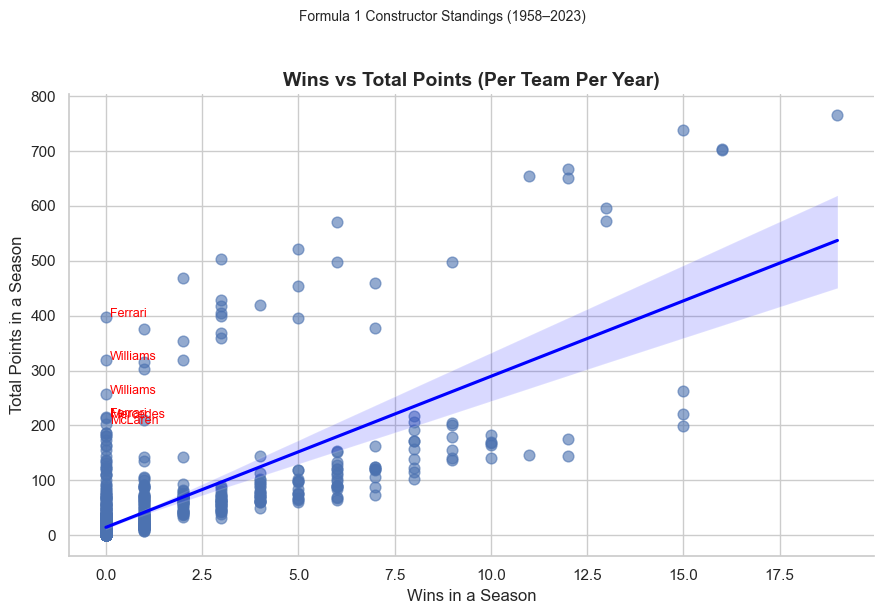

In [50]:
# Wins vs Total Points (Per Team Per Year)
sns.set_theme(style="whitegrid")

# get plot
plot = sns.lmplot(
    data=df_constructor_standings,
    x="wins",
    y="total_points",
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.6, 's': 60},  # 控制点的透明度和大小
    line_kws={'color': 'blue'}
)

# add title, subtitle, label for axis
plt.title("Wins vs Total Points (Per Team Per Year)", fontsize=14, weight='bold')
plt.suptitle("Formula 1 Constructor Standings (1958–2023)", fontsize=10, y=1.02)
plt.xlabel("Wins in a Season", fontsize=12)
plt.ylabel("Total Points in a Season", fontsize=12)

# add outliers annotation：e.g. wins==0 and total_points > 200
outliers = df_constructor_standings[(df_constructor_standings['wins'] == 0) & (df_constructor_standings['total_points'] > 200)]
for _, row in outliers.iterrows():
    plt.text(row['wins'] + 0.1, row['total_points'], row['team'], fontsize=9, color='red')

# show plot
plt.tight_layout()
plt.show()

The chart shows a clear positive correlation between the number of wins and total season points per constructor.

Several zero-win seasons still achieved high total points, suggesting strong consistency or long race calendars, e.g. Ferrari and Williams.

Most teams with 10+ wins score more than 400+ points, while low-win teams show high variance, indicating the importance of other factors like double-points scoring, finish rate, etc.

The regression line captures the upward trend well, but the confidence interval widens at high win counts, hinting at era differences or point system changes.

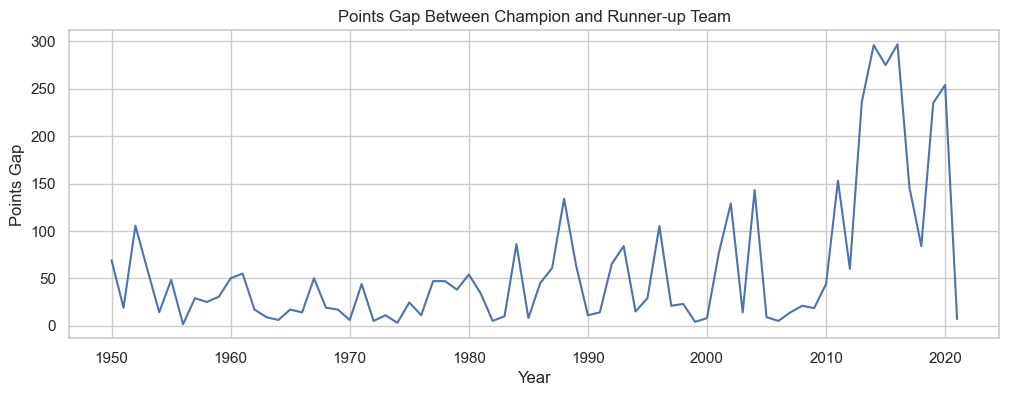

In [51]:
def gap_by_year(g):
    top2 = g.sort_values("rank").head(2)
    if len(top2) == 2:
        return top2.iloc[0]["total_points"] - top2.iloc[1]["total_points"]
    return None

gap_df = df_constructor_standings.groupby("race_year").apply(gap_by_year).dropna()

plt.figure(figsize=(12,4))
gap_df.plot()
plt.title("Points Gap Between Champion and Runner-up Team")
plt.xlabel("Year")
plt.ylabel("Points Gap")
plt.grid(True)
plt.show()

1. Pre-2000: Tight Competition
- Most seasons from 1950 to 1999 show a points gap of less than 100, indicating a competitive title fight between the top two teams.
- Some years (e.g., early 1970s and mid-1990s) show gaps below 20 points, suggesting very close races.

2. Post-2010: Dominance Spikes
- After 2010, several seasons show large gaps over 250 points, especially between 2014 and 2016, reflecting the dominance of one team—likely Mercedes during the hybrid era.

3. Recent Seasons: Rebalancing
- The sharp drop in recent years (likely 2022–2023) suggests a more balanced competition, possibly between Red Bull, Mercedes, or Ferrari.

## Analysis of `calculated_race_results.csv`

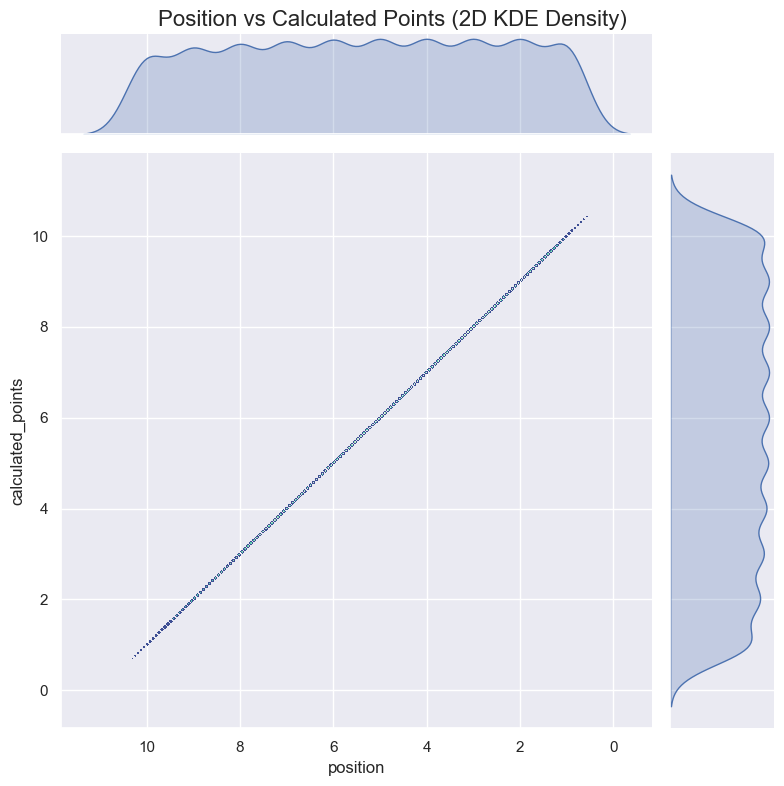

In [58]:
# data cleaning
df_filtered = df_calculated_race_results.dropna(subset=['position', 'calculated_points'])

# Jointplot show rank vs points two-dimensional distribution
sns.set_theme(style="darkgrid")
g = sns.jointplot(
    data=df_filtered,
    x="position",
    y="calculated_points",
    kind="kde",  # could be 'scatter' / 'hex' / 'kde'
    fill=True,
    cmap="mako",
    height=8,
    space=0,
)
g.fig.suptitle("Position vs Calculated Points (2D KDE Density)", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
plt.gca().invert_xaxis()
plt.show()

The KDE density plot reveals a strong negative correlation between position and calculated points—drivers with better race positions consistently earn more points. The linear and tightly clustered diagonal density indicates a stable scoring system in Formula 1.